## Actividad Final modulo 3

#### 1. Crear el siguiente DataFrame indexado:    

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(np.array([[420,60],[380,40],[390,75],[490,55],[300,45]]), columns=["calorias","tiempo"], index=["L","M","X","J","V"])

In [11]:
df

,calorias,tiempo
L,420,60
M,380,40
X,390,75
J,490,55
V,300,45


#### 2. Calcular la media, mediana, y desviación típica de ambas columnas.

In [20]:
media_calorias = df["calorias"].mean()
media_tiempo = df["tiempo"].mean()

desviacion_calorias = df["calorias"].std()
desviacion_tiempo = df["tiempo"].std()

print(f"Media Tiempo: {media_tiempo:.2f} - Desviacion Tiempo: {desviacion_tiempo:.2f} \n\nMedia Calorias: {media_calorias:.2f} - Desviacion Calorias: {desviacion_calorias:.2f}")

Media Tiempo: 55.00 - Desviacion Tiempo: 13.69 

Media Calorias: 396.00 - Desviacion Calorias: 68.77


#### 3. Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe generarse aplicando una fórmula a las otras columnas. El DataFrame resultante debe ser el siguiente:  


In [30]:
# lambda argumentos: expresión
for i,j in df.iterrows() :
    horas = 60/j["tiempo"]
    calorias_x_hora = j["calorias"]*horas
    print(calorias_x_hora)

420.0
570.0
312.0
534.5454545454545
400.0


In [31]:
x = lambda tiempo,calorias: (60/tiempo)*calorias

In [11]:
df[">400"] = (60/df["tiempo"])*df["calorias"] >= 400

In [62]:
df

,calorias,tiempo,>400
L,420,60,True
M,380,40,True
X,390,75,False
J,490,55,True
V,300,45,True


#### 4.  Filtrar el DataFrame y devolver otro DataFrame con las filas pares que cumplan que el número de calorías es mayor de 400. 

In [20]:
df.loc[df[">400"] == True]

,calorias,tiempo,>400
L,420,60,True
M,380,40,True
J,490,55,True
V,300,45,True


#### 5.  Crear a partir del DataFrame una serie con los porcentajes de días que se ha conseguido el reto y los que no. 

In [60]:
porcentaje_cumple_condicion = df.groupby(level=0)['>400'].mean() * 100

In [61]:
porcentaje_cumple_condicion

J    100.0
L    100.0
M    100.0
V    100.0
X      0.0
Name: >400, dtype: float64

**R: Esto quiere decir que el dia miercoles (X) no se cumplio con el reto**

#### 6.  Crear un gráfico como el de más abajo que muestre la progresión de las calorías y tiempo durante la semana. 

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

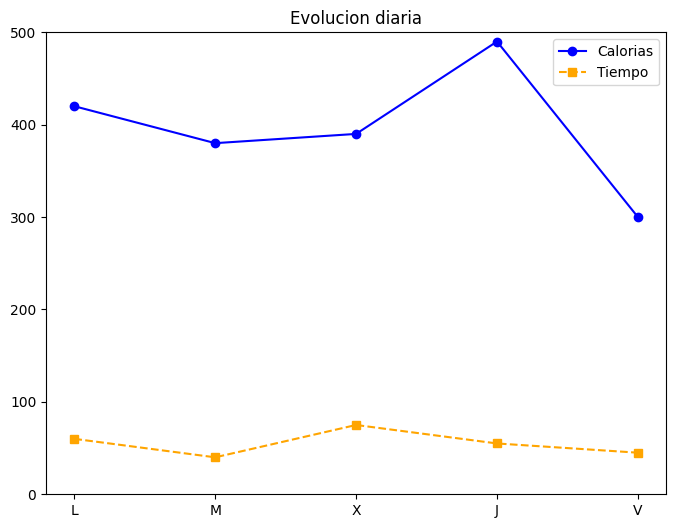

In [56]:
# Crear el objeto de figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar los datos con diferentes colores y marcadores
ax.plot(df.index, df.calorias, color='blue', marker='o', linestyle='-', label='Calorias')
ax.plot(df.index, df.tiempo, color='orange', marker='s', linestyle='--', label='Tiempo')

# Añadir etiquetas de los ejes y título
ax.set_title('Evolucion diaria')

# Añadir una leyenda
ax.legend(loc='upper right')

# Establecer límites en los ejes x e y
ax.set_ylim(0, 500)

# Mostrar la gráfica
plt.show()